<a href="https://colab.research.google.com/github/andresit02/-Tarea-09-Ejercicios-Unidad-04-A-B-Eliminaci-n-gaussiana-vs-Gauss-Jordan/blob/main/Tarea_09_Ejercicios_Unidad_04_A_B_%7C_Eliminaci%C3%B3n_gaussiana_vs_Gauss_Jordan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Realizado por: Andres Fernandez**

1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos.
Explique los resultados desde un punto de vista geométrico.

- a. 𝑥1 + 2𝑥2 = 0,𝑥1 − 𝑥2 = 0.
- b. 𝑥1 + 2𝑥2 = 3, −2𝑥1 − 4𝑥2 = 6.
- c. 2𝑥1 + 𝑥2 = −1,𝑥1 + 𝑥2 = 2,𝑥1 − 3𝑥2 = 5.
- d. 2𝑥1 + 𝑥2 + 𝑥3 = 1,2𝑥1 + 4𝑥2 − 𝑥3 = −1.

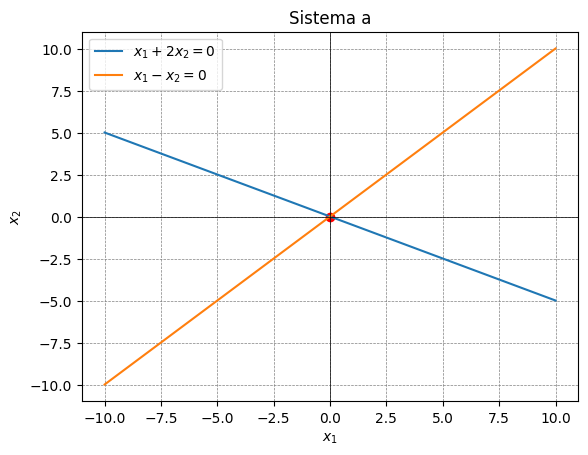

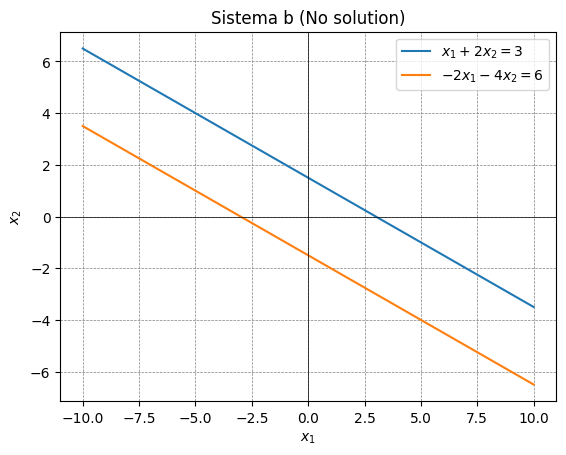

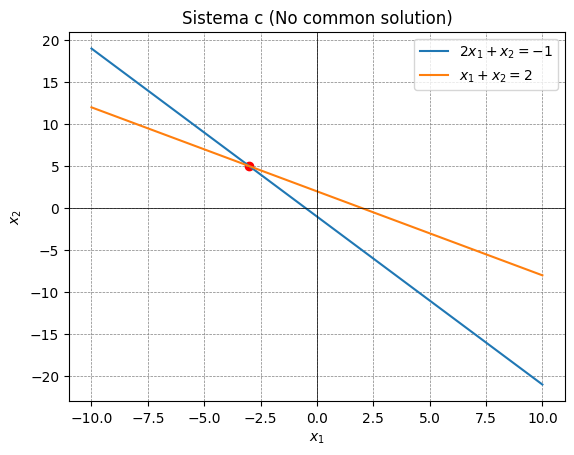

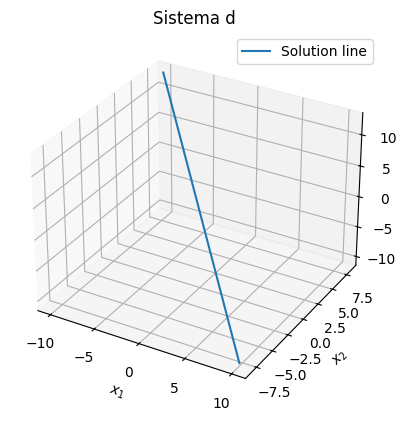

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sistema a
def plot_system_a():
    x = np.linspace(-10, 10, 400)
    y1 = -x / 2
    y2 = x

    plt.figure()
    plt.plot(x, y1, label='$x_1 + 2x_2 = 0$')
    plt.plot(x, y2, label='$x_1 - x_2 = 0$')
    plt.scatter([0], [0], color='red')  # solution (0,0)
    plt.title('Sistema a')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()

# Sistema b
def plot_system_b():
    x = np.linspace(-10, 10, 400)
    y1 = (3 - x) / 2
    y2 = (-3 - x) / 2

    plt.figure()
    plt.plot(x, y1, label='$x_1 + 2x_2 = 3$')
    plt.plot(x, y2, label='$-2x_1 - 4x_2 = 6$')
    plt.title('Sistema b (No solution)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()

# Sistema c
def plot_system_c():
    x = np.linspace(-10, 10, 400)
    y1 = (-1 - 2*x)
    y2 = (2 - x)
    plt.figure()
    plt.plot(x, y1, label='$2x_1 + x_2 = -1$')
    plt.plot(x, y2, label='$x_1 + x_2 = 2$')
    plt.scatter([-3], [5], color='red')  # no solution
    plt.title('Sistema c (No common solution)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()

# Sistema d
def plot_system_d():
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    t = np.linspace(-10, 10, 400)
    x1 = t
    x2 = -4 * t / 5
    x3 = 1 - 6 * t / 5

    ax.plot(x1, x2, x3, label='Solution line')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.legend()
    plt.title('Sistema d')
    plt.show()

plot_system_a()
plot_system_b()
plot_system_c()
plot_system_d()


2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver
los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es 𝑥1 = −1,
𝑥2 = 2, 𝑥3 = 3.)

- a. −𝑥1 + 4𝑥2 + 𝑥3 = 8, 5/

𝑥1 +/

3
 �/
2
3
 2𝑥1 + 𝑥2 + 4𝑥3 = 11.
- b. 4𝑥1 + 2𝑥2 − 𝑥3 = −5, 1/

𝑥1 1/

9
 �/
1
3
.�3 = −1,𝑥3 = 1,

In [2]:
import numpy as np

def round_two_decimals(matrix):
    return np.round(matrix, 2)

def gaussian_elimination_with_partial_pivoting(A, b):
    n = len(b)
    # Form the augmented matrix
    Ab = np.hstack([A, b.reshape(-1, 1)])

    # Apply Gaussian Elimination with partial pivoting
    for i in range(n):
        # Round matrix to two decimal places
        Ab = round_two_decimals(Ab)

        # Pivot
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        # Eliminate
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] = Ab[j, i:] - factor * Ab[i, i:]

    # Round matrix to two decimal places
    Ab = round_two_decimals(Ab)

    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i, -1] - np.sum(Ab[i, i+1:n] * x[i+1:n])) / Ab[i, i]

    return round_two_decimals(x)

# Sistema a
A1 = np.array([[-1, 4, 1],
               [5/3, 2/3, 2/3],
               [2, 1, 4]], dtype=float)
b1 = np.array([8, 1, 11], dtype=float)

# Sistema b
A2 = np.array([[4, 2, -1],
               [1/9, 1/9, -1/3]], dtype=float)
b2 = np.array([-5, -1], dtype=float)

# Solución del sistema a
solution_a = gaussian_elimination_with_partial_pivoting(A1, b1)
print("Solución del sistema a:", solution_a)

# Solución del sistema b
solution_b = gaussian_elimination_with_partial_pivoting(A2, b2)
print("Solución del sistema b:", solution_b)



Solución del sistema a: [-1.01  0.99  3.01]
Solución del sistema b: [  5.92 -14.33]


3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y
determine si se necesitan intercambios de fila:

- a. 𝑥1 − 𝑥2 + 3𝑥3 = 2, 3𝑥1 − 3𝑥2 + 𝑥3 = −1, 𝑥1 + 𝑥2 = 3.
- b. 2𝑥1 − 1.5𝑥2 + 3𝑥3 = 1, −𝑥1 + 2𝑥3 = 3, 4𝑥1 − 4.5𝑥2 + 5𝑥3 = 1.
- c. 2𝑥1 = 3, 𝑥1 + 1.5𝑥2 = 4.5, − 3𝑥2 + 0.5𝑥3 = −6.6, 2𝑥1 − 2𝑥2 + 𝑥3 + 𝑥4 = 0.8.
- d. 𝑥1 + 𝑥2 + 𝑥4 = 2, 2𝑥1 + 𝑥2 − 𝑥3 + 𝑥4 = 1, 4𝑥1 − 𝑥2 − 2𝑥3 + 2𝑥4 = 0, 3𝑥1 − 𝑥2 − 𝑥3 + 2𝑥4 = −3.

In [3]:
import numpy as np

def gaussian_elimination(A, b):
    n = len(b)
    # Form the augmented matrix
    Ab = np.hstack([A, b.reshape(-1, 1)])

    # Store row swaps
    row_swaps = []

    # Apply Gaussian Elimination
    for i in range(n):
        # Partial pivoting
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        if Ab[max_row, i] == 0:
            raise ValueError(f"No unique solution, column {i} is all zeros.")

        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]
            row_swaps.append((i, max_row))

        # Eliminate
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]

    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        if Ab[i, i] == 0:
            raise ValueError(f"No unique solution, zero pivot encountered at row {i}.")
        x[i] = (Ab[i, -1] - np.sum(Ab[i, i+1:] * x[i+1:])) / Ab[i, i]

    return x, row_swaps

# Sistema a
A1 = np.array([[1, -1, 3],
               [3, -3, 1],
               [1, 1, 0]], dtype=float)
b1 = np.array([2, -1, 3], dtype=float)

# Sistema b
A2 = np.array([[2, -1.5, 3],
               [-1, 0, 2],
               [4, -4.5, 5]], dtype=float)
b2 = np.array([1, 3, 1], dtype=float)

# Sistema c
A3 = np.array([[2, 0, 0, 0],
               [1, 1.5, 0, 0],
               [0, -3, 0.5, 0],
               [2, -2, 1, 1]], dtype=float)
b3 = np.array([3, 4.5, -6.6, 0.8], dtype=float)

# Sistema d
A4 = np.array([[1, 1, 0, 1],
               [2, 1, -1, 1],
               [4, -1, -2, 2],
               [3, -1, -1, 2]], dtype=float)
b4 = np.array([2, 1, 0, -3], dtype=float)

# Solución del sistema a
try:
    solution_a, row_swaps_a = gaussian_elimination(A1, b1)
    print("Solución del sistema a:", solution_a)
    print("Intercambios de fila (a):", row_swaps_a)
except ValueError as e:
    print("Error en el sistema a:", e)

# Solución del sistema b
try:
    solution_b, row_swaps_b = gaussian_elimination(A2, b2)
    print("Solución del sistema b:", solution_b)
    print("Intercambios de fila (b):", row_swaps_b)
except ValueError as e:
    print("Error en el sistema b:", e)

# Solución del sistema c
try:
    solution_c, row_swaps_c = gaussian_elimination(A3, b3)
    print("Solución del sistema c:", solution_c)
    print("Intercambios de fila (c):", row_swaps_c)
except ValueError as e:
    print("Error en el sistema c:", e)

# Solución del sistema d
try:
    solution_d, row_swaps_d = gaussian_elimination(A4, b4)
    print("Solución del sistema d:", solution_d)
    print("Intercambios de fila (d):", row_swaps_d)
except ValueError as e:
    print("Error en el sistema d:", e)


Error en el sistema a: operands could not be broadcast together with shapes (3,) (2,) 
Error en el sistema b: operands could not be broadcast together with shapes (3,) (2,) 
Error en el sistema c: operands could not be broadcast together with shapes (3,) (2,) 
Error en el sistema d: No unique solution, column 3 is all zeros.


4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los
siguientes sistemas lineales.

- a.
/
4
𝑥  /
1
5
 �/2+
1
6
 1/

𝑥1 +/

4
 �/
1
5
 1/

𝑥1 + 𝑥2 + 2𝑥3 =
- b. 3.333𝑥1 + 15920𝑥2 − 10.333𝑥3 = 15913, 2.222𝑥1 + 16.71𝑥2 + 9.612𝑥3 = 28.544, 1.5611𝑥1 + 5.1791𝑥2 + 1.6852𝑥3 = 8.4254.
- c. 𝑥1 +
/
2
𝑥  /
1
3
 �/3+
1
 4/
� 1/

𝑥1 1/

3
 �/
1

�3 +

/5
 1/3
𝑥1  
/1
4
� 2/+
1
5
� +
1
/
� 1/

𝑥1 +/

5
 �/
1

/�3 +

/7

- d. 2𝑥1 + 𝑥2 − 𝑥3 + 𝑥4 − 3𝑥5 = 7, 𝑥1 + 2𝑥3 − 𝑥4 + 𝑥5 = 2, −2𝑥2 − 𝑥3 + 𝑥4 − 𝑥5 = −5, 3𝑥1 + 𝑥2 − 4𝑥3 + 5𝑥5 = 6, 𝑥1 − 𝑥2 − 𝑥3 − 𝑥4 + 𝑥5 = −3.𝑥4 =
1
9
.�4 =
1
8
,𝑥4 =
1
7
,4 =
1
6
,4 =
1
6
,8.𝑥3 = 8,
𝑥3 = 9,

In [4]:
import numpy as np

def gauss_elimination_32bit(A, b):
    A = np.array(A, dtype=np.float32)
    b = np.array(b, dtype=np.float32)
    n = len(b)

    # Augmenting the matrix A with vector b
    M = np.hstack((A, b.reshape(-1, 1)))

    for k in range(n):
        # Find the pivot row and swap
        max_index = np.argmax(np.abs(M[k:, k])) + k
        if k != max_index:
            M[[k, max_index]] = M[[max_index, k]]

        # Make the diagonal contain all 1's
        pivot = M[k, k]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be solved")

        M[k] = M[k] / pivot

        # Make the other rows contain 0's in the current column
        for i in range(n):
            if i != k:
                M[i] -= M[i, k] * M[k]

    # Extracting the solution
    x = M[:, -1]
    return x

# Sistemas de ecuaciones
# Sistema a
A_a = [
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 2]
]
b_a = [9, 8, 8]

# Sistema b
A_b = [
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
]
b_b = [15913, 28.544, 8.4254]

# Sistema c
A_c = [
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 15],
    [1/3, 1/4, 1/5, 16],
    [1/4, 1/5, 1/6, 1/7]
]
b_c = [1/6, 1/7, 1/8, 1/9]

# Sistema d
A_d = [
    [2, 1, -1, 1, -3],
    [1, 0, 2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
]
b_d = [7, 2, -5, 6, -3]

# Soluciones
sol_a = gauss_elimination_32bit(A_a, b_a)
sol_b = gauss_elimination_32bit(A_b, b_b)
sol_c = gauss_elimination_32bit(A_c, b_c)
sol_d = gauss_elimination_32bit(A_d, b_d)

print("Solución del sistema a:", sol_a)
print("Solución del sistema b:", sol_b)
print("Solución del sistema c:", sol_c)
print("Solución del sistema d:", sol_d)


Solución del sistema a: [-227.07693  476.92322 -177.69237]
Solución del sistema b: [0.9998865 1.0000001 1.0001063]
Solución del sistema c: [ 1.0328907e-01 -1.0720246e+00  1.7982199e+00 -6.6718087e-05]
Solución del sistema d: [1.8830408  2.8070176  0.73099405 1.4385962  0.09356717]


5. Dado el sistema lineal:
𝑥1 − 𝑥2 + 𝛼𝑥3 = −2,
−𝑥1 + 2𝑥2 − 𝛼𝑥3 = 3,
𝛼𝑥1 + 𝑥2 + 𝑥3 = 2.

- a. Encuentre el valor(es) de 𝛼 para los que el sistema no tiene soluciones.
- b. Encuentre el valor(es) de 𝛼 para los que el sistema tiene un número infinito de soluciones.
- c. Suponga que existe una única solución para una a determinada, encuentre la solución.

In [5]:
def gauss_eliminan(A, b):
    A = np.array(A, dtype=np.float32)
    b = np.array(b, dtype=np.float32)
    n = len(b)

    # Augmenting the matrix A with vector b
    M = np.hstack((A, b.reshape(-1, 1)))

    for k in range(n):
        # Find the pivot row and swap
        max_index = np.argmax(np.abs(M[k:, k])) + k
        if k != max_index:
            M[[k, max_index]] = M[[max_index, k]]

        # Make the diagonal contain all 1's
        pivot = M[k, k]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be solved")

        M[k] = M[k] / pivot

        # Make the other rows contain 0's in the current column
        for i in range(n):
            if i != k:
                M[i] -= M[i, k] * M[k]

    # Extracting the solution
    x = M[:, -1]
    return x

def analyze_system(alpha):
    A = [
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ]
    b = [-2, 3, 2]

    try:
        solution = gauss_elimination(A, b)
        return solution, None
    except ValueError:
        return None, "The system has no solution for alpha = {}".format(alpha)

def find_alpha_values():
    alpha_no_solution = []
    alpha_infinite_solutions = []
    alpha_unique_solution = []

    for alpha in np.linspace(-2, 2, 41):
        solution, error = analyze_system(alpha)
        if error:
            alpha_no_solution.append(alpha)
        else:
            if np.isclose(np.linalg.matrix_rank(np.array([
                [1, -1, alpha],
                [-1, 2, -alpha],
                [alpha, 1, 1]
            ])), 2):
                alpha_infinite_solutions.append(alpha)
            else:
                alpha_unique_solution.append(alpha)

    return alpha_no_solution, alpha_infinite_solutions, alpha_unique_solution

def find_unique_solution(alpha):
    A = [
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ]
    b = [-2, 3, 2]

    solution, error = analyze_system(alpha)
    if error:
        return None
    else:
        return solution

# Encontrar los valores de alpha
alpha_no_solution, alpha_infinite_solutions, alpha_unique_solution = find_alpha_values()

print("Valores de alpha para los cuales el sistema no tiene soluciones:", alpha_no_solution)
print("Valores de alpha para los cuales el sistema tiene un número infinito de soluciones:", alpha_infinite_solutions)

# Suponiendo un alpha que da una solución única
if alpha_unique_solution:
    alpha_example = alpha_unique_solution[0]
    unique_solution = find_unique_solution(alpha_example)
    print("Para alpha =", alpha_example, "la solución única es:", unique_solution)
else:
    print("No se encontraron valores de alpha con una solución única.")

NameError: name 'gauss_elimination' is not defined

7. Repita el ejercicio 4 con el método Gauss-Jordan.

In [6]:
import numpy as np

def gauss_jordan_elimination(A, b):
    # Convertir matrices a precisión de 32 bits
    A = np.array(A, dtype=np.float32)
    b = np.array(b, dtype=np.float32)

    # Construir la matriz aumentada
    Ab = np.hstack((A, b.reshape(-1, 1)))

    n = Ab.shape[0]

    for i in range(n):
        # Hacer el pivote en Ab[i, i] igual a 1
        pivot = Ab[i, i]
        Ab[i] = Ab[i] / pivot

        # Hacer cero en otras filas
        for j in range(n):
            if i != j:
                factor = Ab[j, i]
                Ab[j] -= factor * Ab[i]

    # Extraer la solución
    x = Ab[:, -1]
    return x

# Datos de los sistemas
A1 = [[1/4, 1/5, 1/6],
      [1/3, 1/4, 1/5],
      [1/2, 1, 2]]
b1 = [9, 8, 8]

A2 = [[3.333, 15920, -10.333],
      [2.222, 16.71, 9.612],
      [1.5611, 5.1791, 1.6852]]
b2 = [15913, 28.544, 8.4254]

A3 = [[1, 1/2, 1/3, 1/4],
      [1/2, 1/3, 1/4, 15],
      [1/3, 1/4, 1/5, 16],
      [1/4, 1/5, 1/6, 1/7]]
b3 = [1/6, 1/7, 1/8, 1/9]

A4 = [[2, 1, -1, 1, -3],
      [1, 0, 2, -1, 1],
      [0, -2, -1, 1, -1],
      [3, 1, -4, 0, 5],
      [1, -1, -1, -1, 1]]
b4 = [7, 2, -5, 6, -3]

# Resolución de sistemas
x1 = gauss_jordan_elimination(A1, b1)
x2 = gauss_jordan_elimination(A2, b2)
x3 = gauss_jordan_elimination(A3, b3)
x4 = gauss_jordan_elimination(A4, b4)

# Mostrar resultados
print("Solución para el sistema a:", x1)
print("Solución para el sistema b:", x2)
print("Solución para el sistema c:", x3)
print("Solución para el sistema d:", x4)


Solución para el sistema a: [-227.07668  476.9226  -177.69215]
Solución para el sistema b: [0.9998865 1.0000001 1.0001063]
Solución para el sistema c: [ 1.03289045e-01 -1.07202470e+00  1.79821980e+00 -6.67181157e-05]
Solución para el sistema d: [1.8830409  2.8070173  0.73099416 1.4385965  0.09356724]
